In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import joblib

import warnings
warnings.filterwarnings("ignore")

print("All necessary libraries are imported successfully.")

All necessary libraries are imported successfully.


In [28]:
df = pd.read_csv('salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
151440,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
151441,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
151442,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
151443,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [29]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [30]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,151445.000000,1.514450e+05,151445.000000,151445.000000
mean,2024.435313,1.628380e+05,157527.458411,20.938625
std,0.671842,2.080124e+05,74150.772377,40.620393
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105800.000000,0.000000
50%,2025.000000,1.470000e+05,146100.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [31]:
df.duplicated().sum()

np.int64(79532)

In [32]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [33]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
151440,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
151441,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
151442,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
151443,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


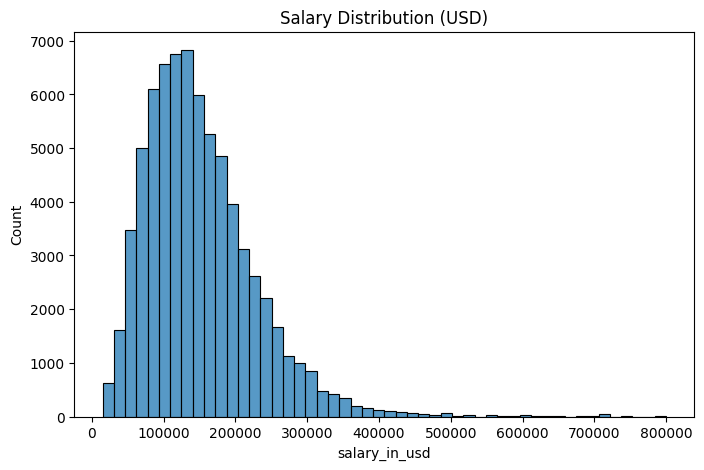

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(df['salary_in_usd'], bins=50)
plt.title("Salary Distribution (USD)")
plt.show()


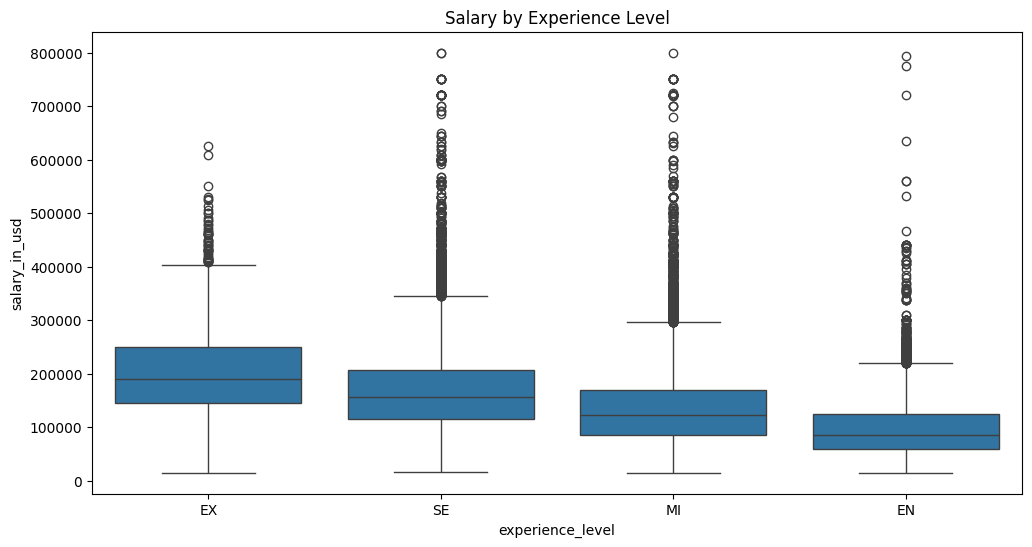

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="experience_level", y="salary_in_usd", data=df)
plt.title("Salary by Experience Level")
plt.show()

In [36]:
df['job_title'] = df['job_title'].str.lower()
top_jobs = df['job_title'].value_counts().head(15).index
df = df[df['job_title'].isin(top_jobs)]

In [37]:
dfA = df.copy()
dfA = dfA.drop(columns=["salary", "salary_currency"])

In [38]:
categorical_cols = dfA.select_dtypes(include="object").columns.tolist()
numerical_cols = dfA.select_dtypes(include=np.number).columns.tolist()

In [39]:
le = LabelEncoder()
for col in categorical_cols:
    dfA[col] = le.fit_transform(dfA[col])

X = dfA.drop(columns=["salary_in_usd"])
y = dfA["salary_in_usd"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"\n{name} Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")


Linear Regression Results:
Mean Squared Error: 5135839373.65
R² Score: 0.16

Random Forest Results:
Mean Squared Error: 4553582459.26
R² Score: 0.25

Gradient Boosting Results:
Mean Squared Error: 4562950012.56
R² Score: 0.25


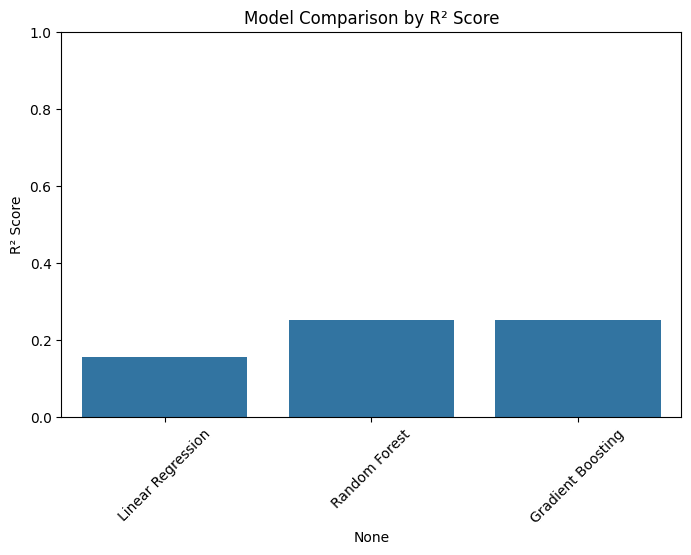

In [41]:
result_df = pd.DataFrame(results).T
plt.figure(figsize=(8, 5))
sns.barplot(x=result_df.index, y=result_df["R2"])
plt.title("Model Comparison by R² Score")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [42]:
pipeline_model_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])
pipeline_model_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [43]:
dfA["predicted_salary"] = pipeline_model_rf.predict(X)

In [44]:
job_salary_summary = (
    dfA
    .groupby("job_title")[["salary_in_usd", "predicted_salary"]]
    .mean()
    .sort_values("salary_in_usd", ascending=False)
)

job_salary_summary

,salary_in_usd,predicted_salary
job_title,,
12,200774.233371,200942.810444
13,194819.515568,194544.774902
9,189465.017620,189737.931357
11,186447.310709,187018.124836
14,178912.576102,178684.579876
10,168475.367663,167373.285570
0,164828.299226,163744.286990
8,164437.366629,164716.462717
5,161995.002437,162529.647464


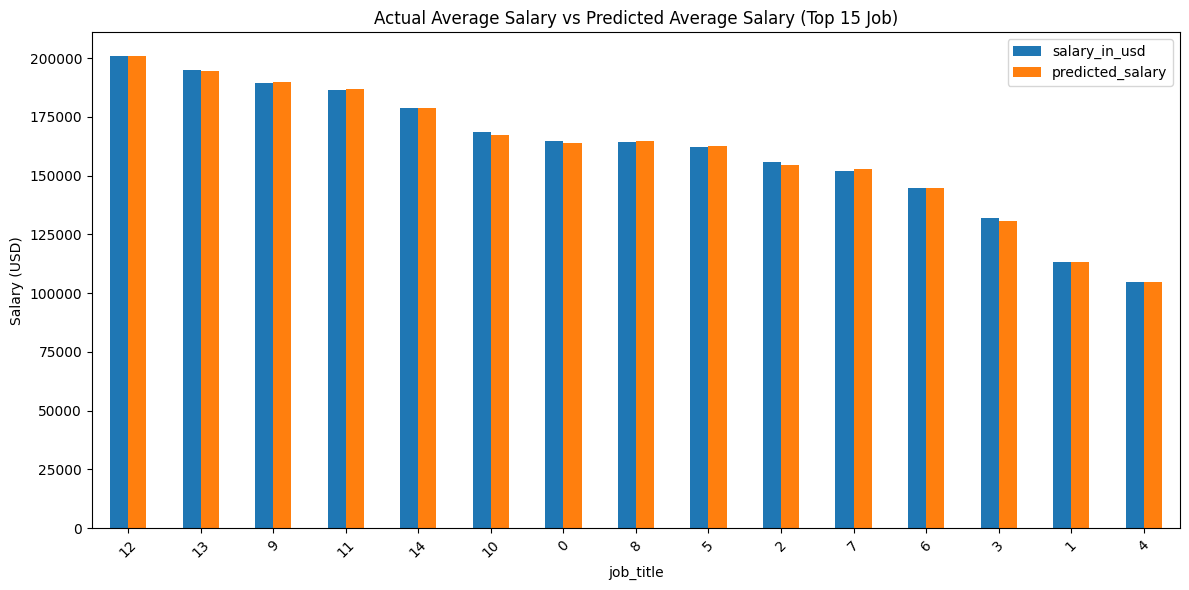

In [45]:
job_salary_summary.plot(
    kind="bar",
    figsize=(12,6)
)

plt.title("Actual Average Salary vs Predicted Average Salary (Top 15 Job)")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
feature = pipeline_model_rf['rf']

feature_importance = pd.Series(
    feature.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance

job_title             0.394311
employee_residence    0.254419
experience_level      0.203266
company_location      0.056115
work_year             0.045864
remote_ratio          0.027049
employment_type       0.009664
company_size          0.009313
dtype: float64

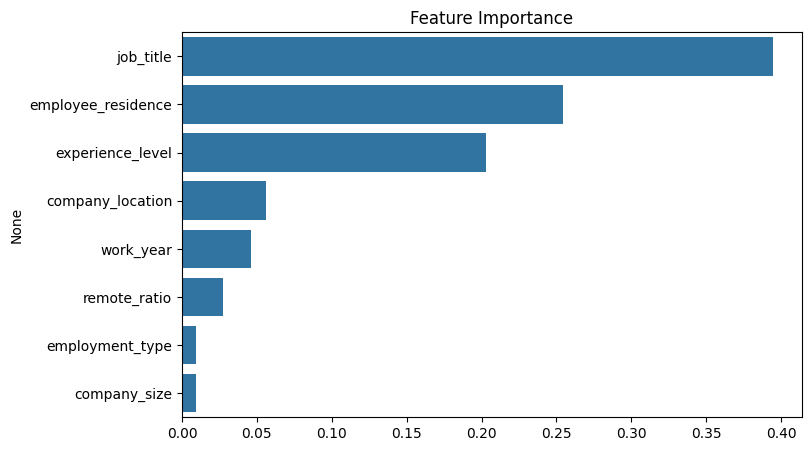

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance")
plt.show()

In [48]:
filename_profit = 'model_salary_predictor.pkl'

print("--- MODEL SAVING PROCESS ---")

try:
    joblib.dump(pipeline_model_rf, filename_profit)
    print(f"Model successfully saved to: {filename_profit}")

except Exception as e:
    print(f"Error while saving the model: {e}")

print("\n--- FILE VERIFICATION ---")
import os
if os.path.exists(filename_profit):
    print(f"File {filename_profit} available to download.")

--- MODEL SAVING PROCESS ---
Model successfully saved to: model_salary_predictor.pkl

--- FILE VERIFICATION ---
File model_salary_predictor.pkl available to download.
